# Probabilities of dice totals
plots the probability distribution of the eye total of arbitrary many, arbitrary-sided dice

In [1]:
import itertools
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

## input
list of dice; e.g. [6,6,20]: two 6-sided dice, one 20-sided die

In [2]:
dice = [6,6,20]

## calculation

In [3]:
# list of lists of all possible eyes for each die
eyes = [ [eye+1 for eye in range(die)] for die in dice ]

# all possible result combinations
combinations = list(itertools.product(*eyes))

# sum of eyes for each combination
eyesum = [sum(combination) for combination in combinations]

# probability distribution
N = np.histogram(eyesum, bins = np.arange( min(eyesum), min(eyesum) + len(set(eyesum)) + 1, 1 ), density=True)

## plot

<Figure size 432x288 with 0 Axes>

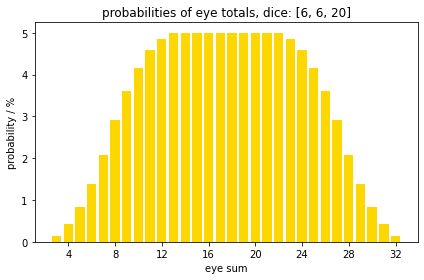

In [4]:
plt.close('all')

plt.figure()
# plt.style.use('dark_background')

ax = plt.figure().gca()
plt.bar(N[1][:-1], N[0]*100, width=0.8, color='gold' )
plt.title(f'probabilities of eye totals, dice: {dice}')
plt.xlabel('eye sum')
plt.ylabel('probability / %')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))   # integer ticks

plt.tight_layout()

plt.show()